In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv('shoes_data2.csv.csv')

In [54]:
X = df[['price', 'availability']].values
def normalize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    return (X - means) / stds, means, stds

X_normalized, means, stds = normalize_features(X)

# Adding an intercept term (column of ones) after normalization
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]


In [55]:
X = df['price'].values
theta = np.zeros(X_normalized.shape[1])
y = df['weight'].values
# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Calculate the cost using the current theta
cost = compute_cost(X_normalized, y, theta)
print("Cost:", cost)

Cost: nan


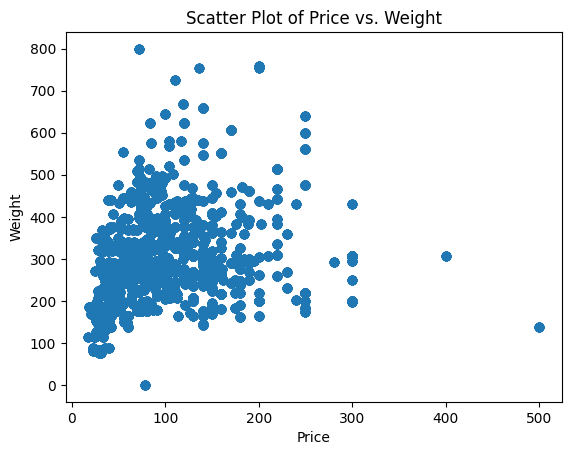

In [58]:
filtered_data = df[df['weight'] < 1000]  # Filter the DataFrame

# Create a scatter plot of price vs. weight
plt.scatter(filtered_data['price'], filtered_data['weight'])  # Make sure column names are correct
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Scatter Plot of Price vs. Weight')
plt.show()

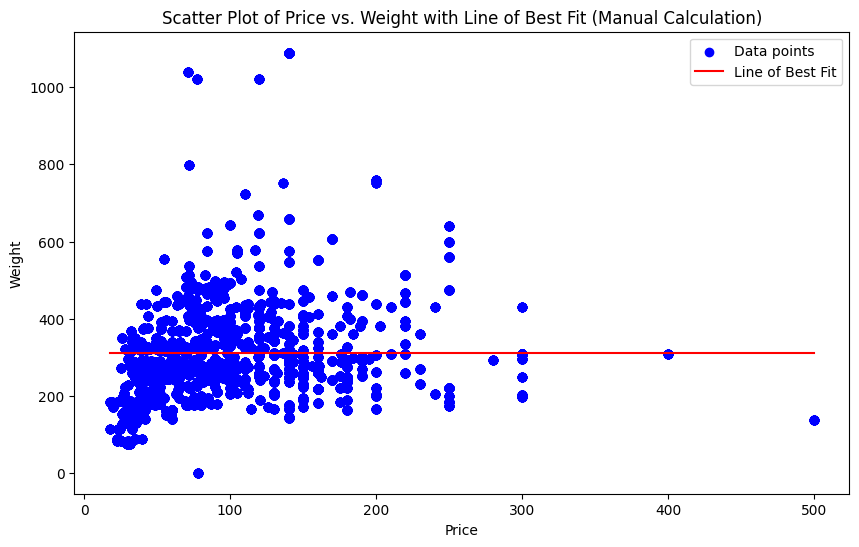

In [68]:
filtered_df = df[df['weight'] < 2000]

# Extract X and Y from the filtered DataFrame
X = filtered_df['price'].values.reshape(-1, 1)
y = filtered_df['weight'].values

# Ensure the arrays are not empty
if X.size == 0 or y.size == 0:
    raise ValueError("X or y is empty after filtering. Adjust the threshold.")

# Calculate the means of X and Y
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the terms needed for the numerator and denominator of beta_1
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)

# Calculate coefficients (slope and intercept)
beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * x_mean

# Generate predictions across the observed range for the line of best fit
X_fit = np.linspace(X.min(), X.max(), 100)
y_fit = beta_0 + beta_1 * X_fit

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', label='Line of Best Fit')
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Scatter Plot of Price vs. Weight with Line of Best Fit (Manual Calculation)')
plt.legend()
plt.show()

Cost at iteration 0: 52269.69023330934
Cost at iteration 100: 11928.41093422465
Cost at iteration 200: 6519.484608902268
Cost at iteration 300: 5794.1095635760885
Cost at iteration 400: 5696.809210954794
Cost at iteration 500: 5683.754146867594
Cost at iteration 600: 5682.0019955062135
Cost at iteration 700: 5681.76675586565
Cost at iteration 800: 5681.735160939696
Cost at iteration 900: 5681.7309155489775
Final trained parameters: [304.0641976   25.90426049  -8.80796213]


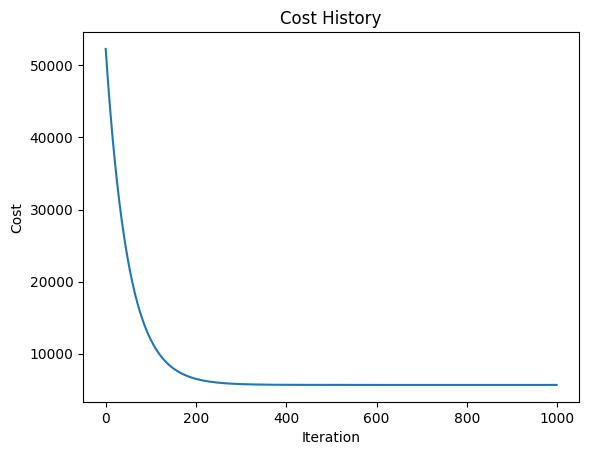

In [35]:
pd.dropna(subset=['weight', 'price', 'availability'], inplace=True)

# Assume 'availability' is a numeric feature, normalize the features
scaler = StandardScaler()
features = ['price', 'availability']
X = pd[features].values
y = pd['weight'].values

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Add a column of ones to X for the bias term (intercept)
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize parameters (theta) to zero
theta = np.zeros(X_normalized.shape[1])

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(errors**2)
        cost_history.append(cost)
        
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Cost at iteration {i}: {cost}")

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X_normalized, y, theta, learning_rate, num_iterations)

# Final parameters
print("Final trained parameters:", theta)

# Plotting the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [ ]:
random_matrix = np.random.rand(2, 1)
augmented_X = np.c_[np.ones(X.shape[0]), X[:, 0]]
print(augmented_X)

[[  1.  160. ]
 [  1.  160. ]
 [  1.  160. ]
 ...
 [  1.   37.5]
 [  1.   37.5]
 [  1.   37.5]]


In [37]:
# Extract theta1 and theta2 from the random matrix
theta1, theta2 = random_matrix.flatten()

# Multiply theta1 by the first column in augmented_X and theta2 by the second column in augmented_X
y = theta1 * augmented_X[:, 0] + theta2 * augmented_X[:, 1]

print(y)

[94.33199566 94.33199566 94.33199566 ... 22.14465175 22.14465175
 22.14465175]


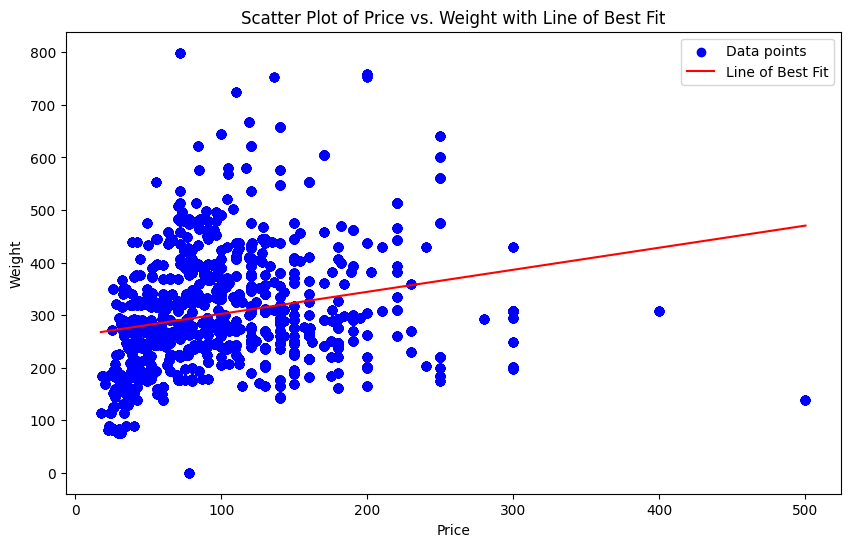

In [ ]:
from sklearn.linear_model import LinearRegression

X = pd['price'].values.reshape(-1, 1) 
y = pd['weight'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generating points for the line of fit
y_fit = model.predict(X_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pd['price'], pd['weight'], color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', label='Line of Best Fit')
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Scatter Plot of Price vs. Weight with Line of Best Fit')
plt.legend()
plt.show()


In [1]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

NameError: name 'model' is not defined